<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-по-данным" data-toc-modified-id="Изучение-общей-информации-по-данным-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации по данным</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-по-данным" data-toc-modified-id="Общая-информация-по-данным-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация по данным</a></span></li><li><span><a href="#Общая-информация-по-пропускам" data-toc-modified-id="Общая-информация-по-пропускам-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация по пропускам</a></span></li><li><span><a href="#Общая-информация-по-явным-дубликатам" data-toc-modified-id="Общая-информация-по-явным-дубликатам-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Общая информация по явным дубликатам</a></span></li></ul></li><li><span><a href="#Предобработка-признаков" data-toc-modified-id="Предобработка-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка признаков</a></span><ul class="toc-item"><li><span><a href="#Цена---целевой-признак" data-toc-modified-id="Цена---целевой-признак-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Цена - целевой признак</a></span></li><li><span><a href="#ID-объявления" data-toc-modified-id="ID-объявления-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ID объявления</a></span></li></ul></li></ul></div>

# Исследование объявлений об аренде квартир

**Задача машинного обучения**

* создать модель машинного обучения, которая будет оценивать квартиры и предлагать стоимость аренды максимально похожую на ту, которую выставляют люди

* технически задача предполагает улучшить метрику качества модели MAPE с 50% до 30% и менее, т.к. эта метрика показывает среднюю абсолютную ошибку в процентах - очень понятную для менеджеров

**Задача команды анализа данных**

* подготовить данные для разработчиков машинного обучения. Они на результатах этой работы будут учить модели предсказывать стоимость аренды квартир.

# Релиз 1.0
Коммит* с результатами EDA или разведочного анализа данных - Exploratory Data Analysis. Например, pdf-отчёт EDA.pdf сформированный из EDA.ipynb. Это необходимо, чтобы топы компании могли понять из отчёта что из себя представляют данные, больше графиков и агрегированной информации, минимум кода в pdf файле

состав репозитория на данном релизе:
README.md описание задачи над которой вы работаете, а также в каком составе
EDA.pdf - отчет из графиков и текстового описания
EDA.ipynb - jupyter notebook, в котором вы делали графики и изучали данные
# Релиз 2.0
Нужно закоммитить результаты очистки данных от пропусков.

состав репозитория дополняется:
preprocessing.ipynb - jupyter notebook файл, где показан процесс обработки данных
data.csv - отвечающий критериям:
названия колонок на английском языке в одно/несколько слов с нижним подчёркиванием
в каждой колонке должны отсутствовать пропущенные значения (NaN, None и т.д.)
# Релиз 3.0
Финальный. Коммит данных с новыми фичами (feature engineering) - это тот же файл preprocessing.ipynb, но уже отрефакторенный с прошлого релиза и файл data.csv c новыми колонками. Но не забудьте оставить колонку с id объявления, дабы можно было сравнить результаты разных команд.

в составе репозитория изменения:
README.md добавлены основные выводы и иллюстрации
data.csv - полностью отвечающий предыдущим и новым критериям:
все значения внутри данных должны быть только численного типа (int или float)
должны отсутствовать полные дубликаты объявлений, только уникальные объявления
preprocessing.ipynb - jupyter notebook файл, где показан весь процесс обработки данных с комментариями, которые объясняют мотивацию принятия тех или иных решений в ходе работы

# Описание данных

**Признаки**

* 'ID  объявления', 
* 'Количество комнат', 
* 'Тип', 
* 'Метро', 
* 'Адрес', 
* 'Площадь, м2', 
* 'Дом', 
* 'Парковка', 
* 'Телефоны', 
* 'Описание', 
* 'Ремонт',
* 'Площадь комнат, м2', 
* 'Балкон', 
* 'Окна', 
* 'Санузел', 
* 'Можно с детьми/животными', 
* 'Дополнительно', 
* 'Название ЖК', 
* 'Серия дома', 
* 'Высота потолков, м', 
* 'Лифт', 
* 'Мусоропровод', 
* 'Ссылка на объявление'

**Целевой признак**
* 'Цена'

### Изучение общей информации по данным

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display

In [48]:
pd.set_option('display.max_columns', None)

In [49]:
#df = pd.read_csv('_data.csv', index_col='Unnamed: 0')
df = pd.read_csv('/home/tata/DS_bootcamp/rent_real_estate/_data.csv')

#### Общая информация по данным

In [50]:
df.head(10)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
5,5,274837728,3,Квартира,м. Смоленская (5 мин пешком),"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",+79684728732,ID 743. С коллегами работаем 50/50. Видовые ап...,Дизайнерский,NaN,NaN,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Smolensky De Luxe,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274837728
6,6,273643908,"5, Оба варианта",Квартира,м. Арбатская (4 мин пешком),"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,"350000.0 руб./ За месяц, Залог - 350000 руб., ...","+79175135482, +79099269384",ID 41980: Предлагается 5-и комнатная квартира...,Евроремонт,43-25-25-25-22,NaN,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/273643908
7,7,274475342,3,Квартира,м. Смоленская (3 мин пешком),"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,"250000.0 руб./ За месяц, Залог - 250000 руб., ...",+79152004882,Лот 112453. Ирина Панченко.\n\nБонус агенту 40...,Евроремонт,26 22 15,NaN,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),Нет,https://www.cian.ru/rent/flat/274475342
8,8,273973191,3,Квартира,м. Смоленская (9 мин пешком),"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",откры

In [51]:
#pd.set_option('display.max_colwidth', 1000)
#df.head()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

In [53]:
# посмотрим распределения признаков по полной выборке
df.describe()

,Unnamed: 0,ID объявления,"Высота потолков, м"
count,23368.000000,2.336800e+04,11206.00000
mean,11683.500000,2.676265e+08,2.98345
std,6745.904881,1.876862e+07,7.61472
min,0.000000,1.072986e+08,1.20000
25%,5841.750000,2.712663e+08,2.64000
50%,11683.500000,2.739030e+08,2.64000
75%,17525.250000,2.746872e+08,2.80000
max,23367.000000,2.750064e+08,320.00000


#### Общая информация по пропускам

In [54]:
nan_count = df.isna().sum()
nan_percent = df.isna().mean().round(4) * 100
nan_df = pd.concat([nan_count, nan_percent], axis=1)
nan_df.columns = ['count_of_nan', 'percentage_of_nan']
nan_df.query('count_of_nan > 0').sort_values(by='percentage_of_nan', ascending=False)\
.style.background_gradient('coolwarm')

,count_of_nan,percentage_of_nan
Серия дома,21205,90.740000
Название ЖК,17520,74.970000
Парковка,13417,57.420000
"Высота потолков, м",12162,52.050000
Мусоропровод,10522,45.030000
"Площадь комнат, м2",8910,38.130000
Балкон,7978,34.140000
Окна,6613,28.300000
Можно с детьми/животными,6096,26.090000
Лифт,5500,23.540000


#### Общая информация по явным дубликатам

In [55]:
df.duplicated().sum()

0

*Вывод: при первом знакомстве с данными видим в файле 24 признака и 23368 объектов, есть много пропусков. Целевой признак, а именно цену нужно выделить в отдельный столбец в типе float. Видим пропуски в 15 признаках, в одно из которых(Серия дома) их количество более 90% от общего количества данных. Ниже более детально разберем их причины и возможность исправления. Явные дубликаты в данных отсутствуют.*

### Предобработка признаков

#### Цена - целевой признак

*Преобразуем первую цифру в столбце в тип float и сохраним в отдельную колонку 'Стоимость аренды' - этот признак и будет в дальнейшем целевым. Проверим на пропуски. Посмотрим распределение признака на гистограмме. Из колонки Цена можно извлечь доп признак "Стоимость залога", который также считаем существенным для машинного обучения.*

In [56]:
# s = '500000.0 руб./ За месяц, Залог - 500000 руб., ..'
# #[c for c in s.split() if isinstance(c, ('int', 'float'))]
# result = [float(c) for c in s.split() if c.replace('.', '', 1).isdigit()]
# print(result)

In [57]:
df['Стоимость аренды'] = df['Цена'].str.extract('(\d+\.?\d*)').astype('float')
df.head()

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Стоимость аренды
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0


In [58]:
print('Количество пропусков:', df['Стоимость аренды'].isna().sum())

Количество пропусков: 0


*Посмотрим распределение значений в целевом признаке*

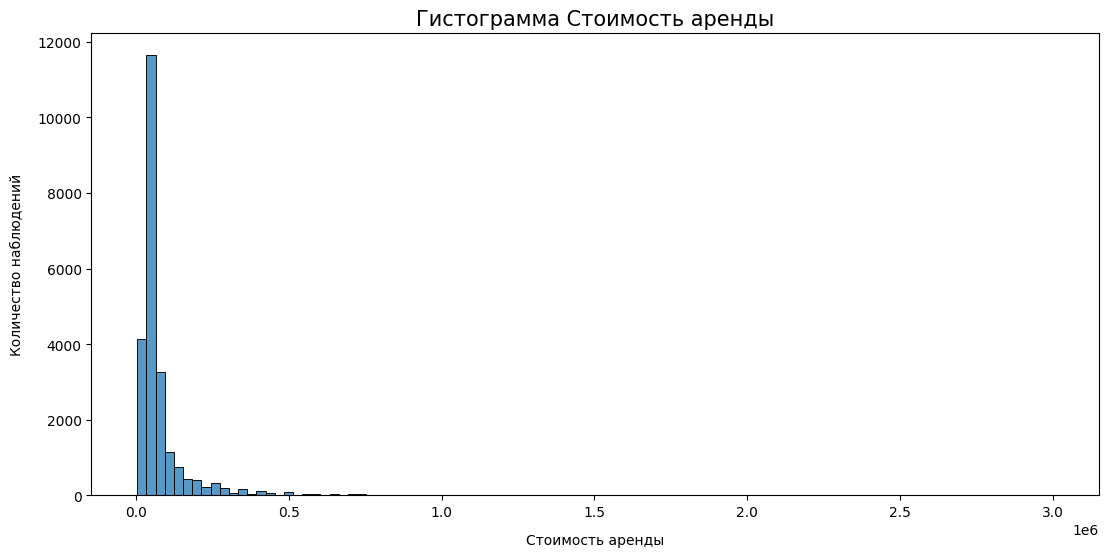

In [59]:
plt.figure(figsize=[13, 6])
sns.histplot(data=df['Стоимость аренды'], bins=100)
plt.title('Гистограмма Стоимость аренды', fontsize=15)
plt.xlabel('Стоимость аренды', labelpad=10, fontsize=10) #привести к норм цифрам+boxplot
plt.ylabel('Количество наблюдений', labelpad=10, fontsize=10)
plt.show();

#### ID объявления

*Данный столбец не влияет на цену, не принесет никакой информативности для предстоящего машинного обучения, рекомендован к удалению в полном объеме без анализа и обработки.*

Количество комнат

In [60]:
df['Количество комнат'].nunique()

24

In [61]:
list(df['Количество комнат'].unique())

['4',
 '4, Оба варианта',
 '2',
 '3',
 '5, Оба варианта',
 '3, Изолированная',
 '5',
 '5, Изолированная',
 '2, Оба варианта',
 '3, Оба варианта',
 '6',
 '1',
 '4, Изолированная',
 '6, Оба варианта',
 '2, Изолированная',
 nan,
 '2, Смежная',
 '4, Смежная',
 '3, Смежная',
 '6, Изолированная',
 '1, Изолированная',
 '1, Оба варианта',
 '5, Смежная',
 '6, Смежная',
 '1, Смежная']

*Это важный признак нужно его оставить. Количество уникальных значений - 24. Нужно предобработать этот признак, преобразовав в тип int, выделив число из str. Пропусков менее 5%, после преобразования их можно заполнить медианным значанием.*

ТИП

In [62]:
df['Тип'].nunique()

1

In [63]:
list(df['Тип'].unique())

['Квартира']

*В данном столбце нет пропусков, уникальное значение одно - "Квартира". Это не несет никакой информативности для машинного обучения и на цену не влияет. Данный признак нужно удалить.*

Метро

In [64]:
df['Метро'].isna().sum()

1315

In [65]:
df['Метро'].nunique()

5866

In [66]:
list(df['Метро'].unique())
#считаю, что надо отделить первое слово - название и по ему кодировать

['м. Смоленская (9 мин пешком)',
 'м. Смоленская (8 мин пешком)',
 'м. Смоленская (7 мин пешком)',
 'м. Смоленская (3 мин пешком)',
 'м. Арбатская (7 мин пешком)',
 'м. Смоленская (5 мин пешком)',
 'м. Арбатская (4 мин пешком)',
 'м. Арбатская (10 мин пешком)',
 'м. Смоленская (2 мин пешком)',
 'м. Кропоткинская (5 мин пешком)',
 'м. Кропоткинская (6 мин пешком)',
 'м. Арбатская (5 мин пешком)',
 'м. Александровский сад (12 мин пешком)',
 'м. Арбатская (9 мин пешком)',
 'м. Арбатская (8 мин пешком)',
 'м. Арбатская (11 мин пешком)',
 'м. Арбатская (15 мин пешком)',
 'м. Смоленская (None мин пешком)',
 'м. Смоленская (6 мин пешком)',
 'м. Кропоткинская (8 мин пешком)',
 'м. Смоленская (4 мин пешком)',
 'м. Арбатская (6 мин пешком)',
 'м. Смоленская (10 мин пешком)',
 'м. Киевская (None мин пешком)',
 'м. Арбатская (None мин пешком)',
 'м. Александровский сад (4 мин пешком)',
 'м. Арбатская (3 мин пешком)',
 'м. Смоленская (11 мин пешком)',
 'м. Арбатская (12 мин пешком)',
 'м. Библиотек

*Имеем 5866 уникальных значений, менее 6% пропусков. Время до метро - важная информация, имеет смысл сделать из нее доп признак. Также можно выделить в дом признак названия метро, и потом их закодировать, если таких признаков не будет слишком много*

Адрес

In [67]:
df['Адрес'].nunique()

12850

*Имеем более 12 тыс. уникальных значение. Данный признак можно удалить, более информативным является признак с наименованием метро, который мы планируем создать*

Дом

In [68]:
df['Дом'].nunique()

2565

In [69]:
list(df['Дом'].unique())

['5/16, Монолитный',
 '5/16, Монолитно-кирпичный',
 '5/16',
 '5/6',
 '12/26, Панельный',
 '3/7',
 '4/5',
 '2/4, Монолитный',
 '5/10, Сталинский',
 '2/7, Сталинский',
 '6/7',
 '4/8, Кирпичный',
 '2/4, Кирпичный',
 '6/8, Монолитный',
 '5/9, Монолитный',
 '19/26',
 '5/9',
 '4/7, Кирпичный',
 '3/3',
 '12/26',
 '2/7',
 '8/9, Монолитный',
 '3/3, старый фонд',
 '3/8',
 '4/7',
 '5/13, Монолитный',
 '8/10, Монолитно-кирпичный',
 '3/6, старый фонд',
 '3/13, Монолитно-кирпичный',
 '10/13, Монолитно-кирпичный',
 '5/13, Монолитно-кирпичный',
 '4/5, Монолитно-кирпичный',
 '21/26',
 '7/7',
 '5/7, Монолитно-кирпичный',
 '3/5',
 '4/4',
 '9/16, Монолитно-кирпичный',
 '4/6',
 '4/16, Монолитно-кирпичный',
 '8/9, Монолитно-кирпичный',
 '7/7, Кирпичный',
 '6/17, Монолитно-кирпичный',
 '8/16, Монолитный',
 '12/13',
 '7/9',
 '3/6, Кирпичный',
 '2/3, Кирпичный',
 '5/5, Кирпичный',
 '3/3, Кирпичный',
 '6/17, Монолитный',
 '2/12, Монолитно-кирпичный',
 '8/16, Монолитно-кирпичный',
 '3/13',
 '2/14, Монолитный',
 

*Имеем 2565 уникальных значений, пропусков нет. Можно создать из этого признака 3 новых доп признака: этаж продаваемой квартиры, этажность дома и тип дома. Затем типе дома пропуски заменить заглушками.*

Парковка

In [70]:
df['Парковка'].nunique()

5

In [71]:
list(df['Парковка'].unique())

['подземная', nan, 'наземная', 'открытая', 'многоуровневая', 'на крыше']

*Имеем всего 5 уникальных значений, 57% пропусков. Признак важный, закодироуем его, предварительно пропуски заполнив нулями.*

В колонке "Площадь, м2":
1. нет нулевых значений;
2. Не установлен формат отражения информации о площади. Предлагаю оставить общую площадь, так как она есть во всех (предположительно) строках. 
   

In [72]:
#Площадь
df['Площадь, м2'].isna().sum() 

0

In [73]:
#Новый список c общей площадью---> в столбец
lst = df['Площадь, м2'].tolist()
new = []
for i in lst:
    if len(i)<=4:
        i = float(i)
    else: 
        i = i.split('/')[0]
    new.append(i)
sq_correct = pd.Series(new)
sq_correct  

0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.1
23366     52.5
23367     90.0
Length: 23368, dtype: object

колонка "Телефоны" рекомендуется к удалению,  так как не несет в себе данных для ML

колонку "Описание" оставим на back-up, на случай, если понадобится в единичных случаях выцепить информацию. По факту она для ML нам не нужна. 

Колонка "Ремонт":
1. Проверить на NaN
2. В строках с NaN поставить заглушку типа "Не указано"
3. Закодировать 'Дизайнерский', 'Евроремонт', 'Косметический', 'Не указано', 'Без ремонта' - 5 значений кодировки 

In [74]:
df['Ремонт'].isna().sum() 

2755

In [75]:
df['Ремонт'].unique()

array(['Дизайнерский', 'Евроремонт', 'Косметический', nan, 'Без ремонта'],
      dtype=object)

колонка "Площадь комнат, м2	": поскольку не указан единый формат и везде разное количество комнат, рекомендуется к удалению

Колонка "Балкон":
1. Предлагаю закодировать: "Балкон", "Лоджия", "Отсутствует"(для пропусков или NaN)  - 3 значения кодировки 
2. Указать количество балконов/лоджий в отдельной колонке (то, что в скобках)

In [76]:
df['Балкон'].unique()

array([nan, 'Балкон (1)', 'Балкон (3)', 'Лоджия (1)',
       'Балкон (2), Лоджия (3)', 'Балкон (1), Лоджия (1)', 'Балкон (2)',
       'Лоджия (2)', 'Балкон (3), Лоджия (3)', 'Балкон (3), Лоджия (1)',
       'Лоджия (3)', 'Балкон (1), Лоджия (2)', 'Балкон (2), Лоджия (1)',
       'Балкон (2), Лоджия (2)', 'Балкон (1), Лоджия (3)', 'Балкон (4)',
       'Лоджия (4)', 'Балкон (4), Лоджия (4)', 'Балкон (1), Лоджия (4)'],
      dtype=object)

In [77]:
df['Балкон'].isna().sum() #Заменяем на "Отсутствует"?


7978

Колонка "Окна":
1. Предлагаю закодировать: "'На улицу и двор', 'Во двор', 'На улицу', 'Не указано'(для пропусков или NaN) - 4 значения кодировки 

In [78]:
df['Окна'].unique()

array([nan, 'На улицу и двор', 'Во двор', 'На улицу'], dtype=object)

In [79]:
df['Окна'].isna().sum()

6613

In [80]:
df['Санузел'].value_counts(dropna=False).reset_index()

# общая информация по санузул, большая часть сета - квартиры с 1 совмещенным или раздельным санузлом, незаполненных строк - 2672.
# 20 уникальных значений, далее можно закодировать на 20 различных значения и просмотреть корреляцию. Возможно потребуется корректировка на уменьшение значений или пересмотр кодировки.
# в зависимости от корреляции к цене совмещенного или раздельного санузла nan возможно заменить на одно из значений (т.к. хоть 1 санузел в квартире точно есть). если корреляция небольшая или её нет, можно привести просто к количеству санузлов.

,Санузел,count
0,Совмещенный (1),10078
1,Раздельный (1),7158
2,NaN,2672
3,Совмещенный (2),1437
4,"Совмещенный (1), Раздельный (1)",812
5,Раздельный (2),534
6,Совмещенный (3),241
7,"Совмещенный (2), Раздельный (1)",188
8,Совмещенный (4),77
9,Раздельный (3),52


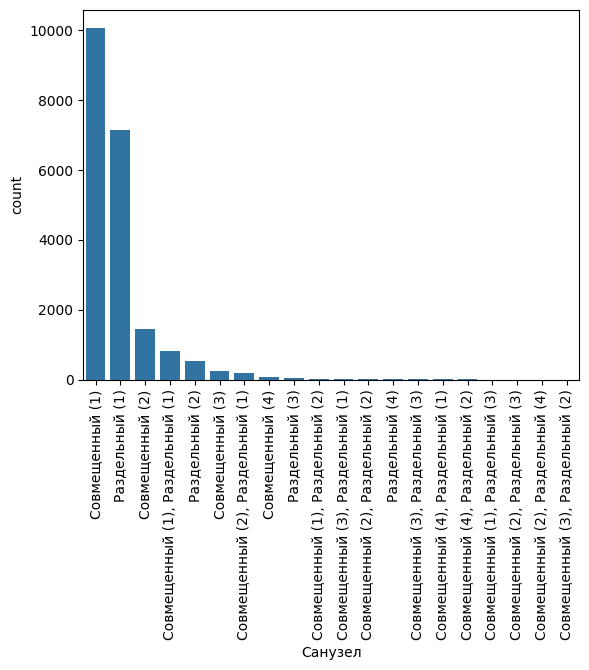

In [81]:
sns.barplot(data=df['Санузел'].value_counts(dropna=False).reset_index(), x='Санузел', y='count')
plt.xticks(rotation=90);


In [82]:
df['Можно с детьми/животными'].value_counts(dropna=False).reset_index()
# Небольшое количество уникальных значений, далее можно закодировать на 4 различных значения и просмотреть корреляцию. Возможно потребуется корректировка, как в пункте выше.
# Т.к. по Nan информацию подтянуть ниоткуда нельзя, препдоположим, что это означает, что нельзя ни с детьми, ни с животными.

,Можно с детьми/животными,count
0,Можно с детьми,10134
1,"Можно с детьми, Можно с животными",6899
2,NaN,6096
3,Можно с животными,239


In [83]:
df[['Дополнительно']].describe()

# 528 уникальных значений, предположительно кодировка в изначальном виде не имеет. возможно придется обрабатывать текст в список и делать вывод по элементам списка.
# пропусков мало, возможна большая корреляция с ценой. ясно будет после выявления цены.

,Дополнительно
count,23011
unique,528
top,"Мебель в комнатах, Мебель на кухне, Ванна, Сти..."
freq,2896


In [84]:
df['Название ЖК'].value_counts(dropna=False).reset_index()

# 17520 пропусков, в остальном много уникальных значений с малым количеством повторений. предполагаем, что корреляция есть. 
# тогда все где есть название - дома более высокого класса жилья. после кодируем на 2 признака в этом ключе.

,Название ЖК,count
0,NaN,17520
1,"Символ, 2019",61
2,"Водный, 2015",45
3,Квартал на Ленинском,37
4,"Метрополия, 2021",36
...,...,...
1794,"Помидор, 2000",1
1795,"Талисман на Дмитровском, 2022",1
1796,"LIFE-Волжская, 2012",1
1797,"Грани, 2020",1


In [85]:
df['Серия дома'].value_counts(dropna=False).reset_index()

# заполненных строк мало, наибольшее количество встречается среди "индивидуальным проектом" в разном регистре. 
# можно предположить, что есть корреляция с ценой. тогда все остальные значения можно представить, как типовое жилье. дальше произвести кодировку по 2 признакам.

,Серия дома,count
0,NaN,21205
1,индивидуальный проект,615
2,Индивидуальный проект,139
3,П44,89
4,П44Т,63
...,...,...
389,I-510 (I-510/23БИ),1
390,КПД-4572А,1
391,Монолитный,1
392,П44т,1


In [86]:
df[['Высота потолков, м']].describe()
#Пропуски можно заменить на среднее
#Еще меня волнует вопрос, что за потолки 1.2 м и 320 м - надо пофиксить

,"Высота потолков, м"
count,11206.00000
mean,2.98345
std,7.61472
min,1.20000
25%,2.64000
50%,2.64000
75%,2.80000
max,320.00000


In [87]:
df[['Высота потолков, м']].value_counts().sort_index(ascending=False)

Высота потолков, м
320.0                 2
310.0                 1
280.0                 1
265.0                 1
264.0                 2
                     ..
2.3                   3
2.2                   2
2.1                   1
2.0                   3
1.2                   1
Name: count, Length: 95, dtype: int64

In [88]:
df['Лифт'].value_counts(dropna=False).reset_index()

# ситуация схожая с санузлами,только под NaN можно предположить отсутствие лифта. 
# можно заменить значениями суммирующими общее количество лифтов в доме (и пассажирских и грузовых) и проверить корреляцию

,Лифт,count
0,Пасс (1),5911
1,NaN,5500
2,Пасс (2),4326
3,"Пасс (1), Груз (1)",3962
4,"Пасс (2), Груз (1)",1224
5,"Пасс (2), Груз (2)",654
6,Пасс (3),636
7,Пасс (4),346
8,"Пасс (3), Груз (1)",187
9,"Пасс (1), Груз (2)",185


In [89]:
df['Мусоропровод'].value_counts(dropna=False).reset_index()

# предположительно наличие мусоропровода должно влиять. более половины значений пропущено
# примем, что да - 2, нет - 1 или nan - 0. проверим корреляцию и далее будем делать выводы, использовать ли в конечном релизе.

,Мусоропровод,count
0,Да,10897
1,NaN,10522
2,Нет,1949


In [90]:
df['Ссылка на объявление']

# все значения уникальны и не имеют влияния на реальную цену, учитывать не будем

0        https://www.cian.ru/rent/flat/271271157
1        https://www.cian.ru/rent/flat/271634126
2        https://www.cian.ru/rent/flat/271173086
3        https://www.cian.ru/rent/flat/272197456
4        https://www.cian.ru/rent/flat/273614615
                          ...                   
23363    https://www.cian.ru/rent/flat/215565511
23364    https://www.cian.ru/rent/flat/274654844
23365    https://www.cian.ru/rent/flat/268679909
23366    https://www.cian.ru/rent/flat/274807525
23367    https://www.cian.ru/rent/flat/274672243
Name: Ссылка на объявление, Length: 23368, dtype: object